목표
  - 학생 석적 데이터를 인공신경망 모델로 학습시켜보자!
  - keras 활용법 숙지
  

In [3]:
!ls # 현재 작업 폴더의 내부(폴더, 파일) 살펴보기

drive  sample_data


In [6]:
!pwd # 현재 작업폴더 경로 확인

/content


In [10]:
%cd /content/drive/MyDrive/Colab Notebooks
# 작업 폴더 경로 변경

/content/drive/MyDrive/Colab Notebooks


In [8]:
!ls

 data  'ex01_Keras맛보기(학생성적데이터).ipynb'


In [9]:
!pwd

/content/drive/MyDrive/Colab Notebooks


데이터 로딩

In [11]:
import pandas as pd

In [13]:
# 구분자 데이터가 ; 로 저장되어 있음
studentData=pd.read_csv('./data/student-mat.csv',delimiter=';')

In [14]:
studentData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### 문제와 답 분리

In [18]:
studentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [22]:
studentData['studytime']

0      2
1      2
2      2
3      3
4      2
      ..
390    2
391    1
392    1
393    1
394    1
Name: studytime, Length: 395, dtype: int64

In [23]:
X= studentData['studytime']
y= studentData['G3']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
X_train.shape

(316,)

In [28]:
X_test.shape

(79,)

### 신경망 모델 만들기
1. 신경망 구조 설계
2. 신경망 모델 학습(loss, optimizer)/평가(metrics)방법 설정
3. 학습 및 학습과정 시각화
4. 모델평가

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense


In [31]:
# 1. 신경망 구조 설계
model = Sequential() # 딥러닝 모델을 구성하는 뼈대
model.add(InputLayer(input_shape=(1,))) # 입력층 설정
model.add(Dense(units=3)) # 입력과 출력사이 중간층(은닉층 hiddenLayer) 
model.add(Dense(units=9))
model.add(Dense(units=6))
model.add(Dense(units=1)) # 출력층 

In [32]:
# 2. 신경망 모델 학습 (loss, optimizer)/평가(metrics)방법 설정 SGD 확률적 경사 하강
model.compile(loss='mean_squared_error',
              optimizer='SGD')

In [ ]:
# 3. 학습 및 학습과정 시각화
studentHistory=model.fit(X_train,y_train, epochs=100) # epochs 학습횟수

In [34]:
import matplotlib.pyplot as plt

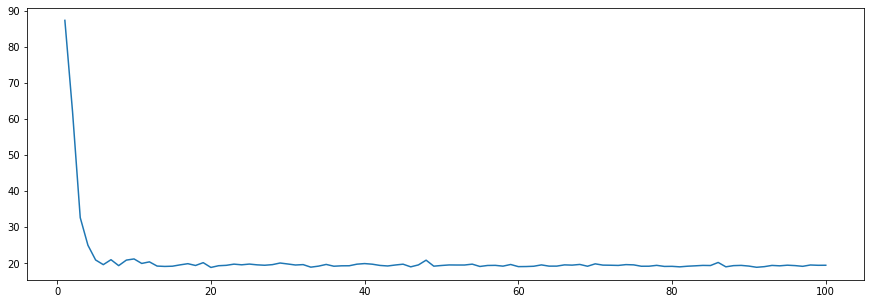

In [35]:
plt.figure(figsize=(15,5))
plt.plot(range(1,101),
         studentHistory.history['loss'],
         label='loss')
plt.show()

In [36]:
# 4. 모델 평가
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 7ms/step - loss: 28.1966


28.196552276611328